## Prédicition de la qualité du vin

## 1. Lecture des données

In [1]:
import numpy as np
import pandas as pd

####  Importons fichier de données. Il est nommé winequality.csv.

In [2]:
df = pd.read_csv('/home/fouba/Documents/Tech4Tchad/python/MachineLearning/TP/winequality-red1.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


 Avant de faire l'analyse, il est mieux de s'assurer du types de variable grâce à la fonction __dtypes__

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

On comprend que toutes les données sont de type numérique (float64 et int64)
Maintenant voyons quelques details de chaque colonne, c'est -à-dire __le nombre total, la moyenne__, __le minimum__ , __le maximum__ et __l'écart-type__

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Analyse Exploratoire et Visualisation des données

 Le type de données de la colonne __quality__ est un int64
 Maintenant, inspectons chaque features ( colonnes ) pour mieux comprendre notre dataset. 
 Le target dans notre cas est la qualité ( quality).  Recherchons les nombres dont est composée notre cible afin de determiner si l'espace est restreint ou non.  Cela est possible par la methode __unique()__ utilisée ci-dessous. 

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Le target est uniquement composé de nombre allant de 3 à 8. Notre espace n'est pas infini. On vient de faire une __analyse univariée__ .

Chaque nombre de  l'intervale de 3 à 8 represente une catégorie de notre dataset. 


Voyons l'histogramme de notre target __quality__

<Axes: >

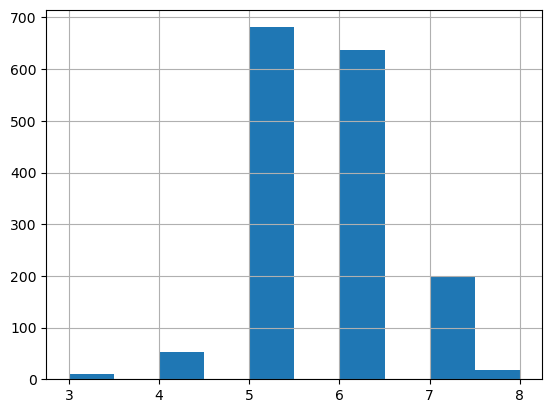

In [6]:
df['quality'].hist()

Essayons de visualiser notre dataset en important les bibliothèques 
- seaborn
- matplotlib

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns



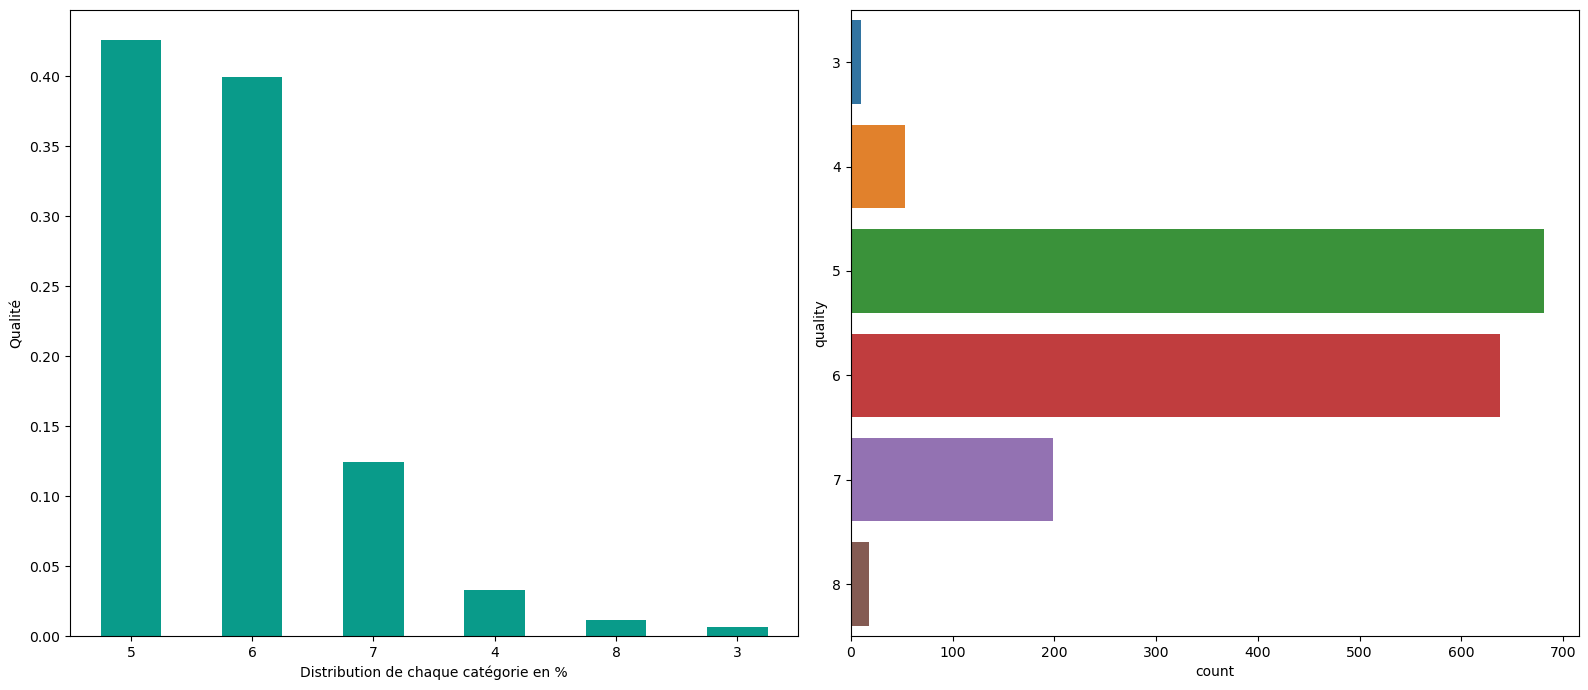

In [8]:
# on fixe la taille de la figure
plt.figure(figsize=(16,7)) 
# on affiche les différents tracés
plt.subplot(1,2,1)
df['quality'].value_counts(normalize=True).plot.bar(rot=0,color='#099b8a')
plt.ylabel('Qualité')
plt.xlabel('Distribution de chaque catégorie en %')
plt.subplot(1,2,2)
# on affiche le compte de chaque catégorie de notre target
sns.countplot(data=df,y='quality')
plt.tight_layout()
plt.show()

La catégorie 5 a une forte distribution. Elle est secondée par la catégorie 6 . Mais la catégorie 3 présente  une faible distribution

La qualité du vin est déterminée par les differentes caractéristiques qu'on appelle __features__ .
 De ce fait regroupons tous nos features dans une variable :
 

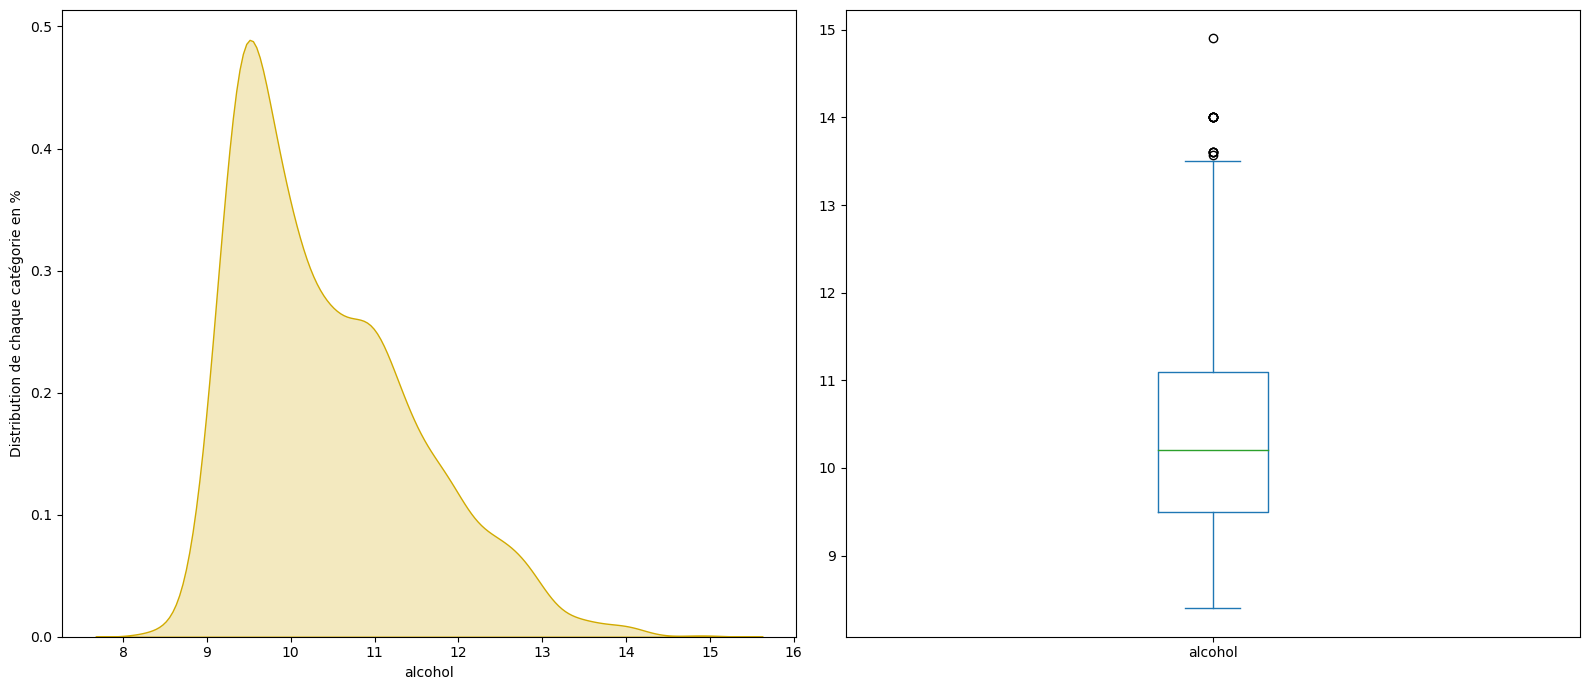

In [9]:
# on  stocke dans une variable les colonnes sans le target quality
df_features = df.drop(columns = 'quality')

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'], fill = True, color = '#d1aa00')
plt.ylabel('alcohol')
plt.ylabel('Distribution de chaque catégorie en %')
plt.subplot(1,2,2)
df_features['alcohol'].plot.box()
plt.tight_layout()
plt.show()

__hypothèse(1)__ :
Le rendu ci-dessus pourrait laisser croire que les données du feature __alcohol__ sont plus concentrées à gauche. 

Nous avons la distribution du feature alcohol. Nous allons afficher toutes les distributions des autres features . 
Pour cela, mettons tous nos features dans une liste.

In [10]:
# on convertit les features en une liste de columns
columns = df_features.columns.tolist()
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Déterminons la taille de notre liste, c'est-à-dire le nombre d'élément qu'elle contient : 

In [11]:
len(columns)

11

On voit quelle contient onze (11) éléments.  Nous allons examiner tous ces éléments grâce à la boucle __for__ pour pouvoir les visualiser.
 Cela doit permettre de voir leur disparité  et leur symétrie.

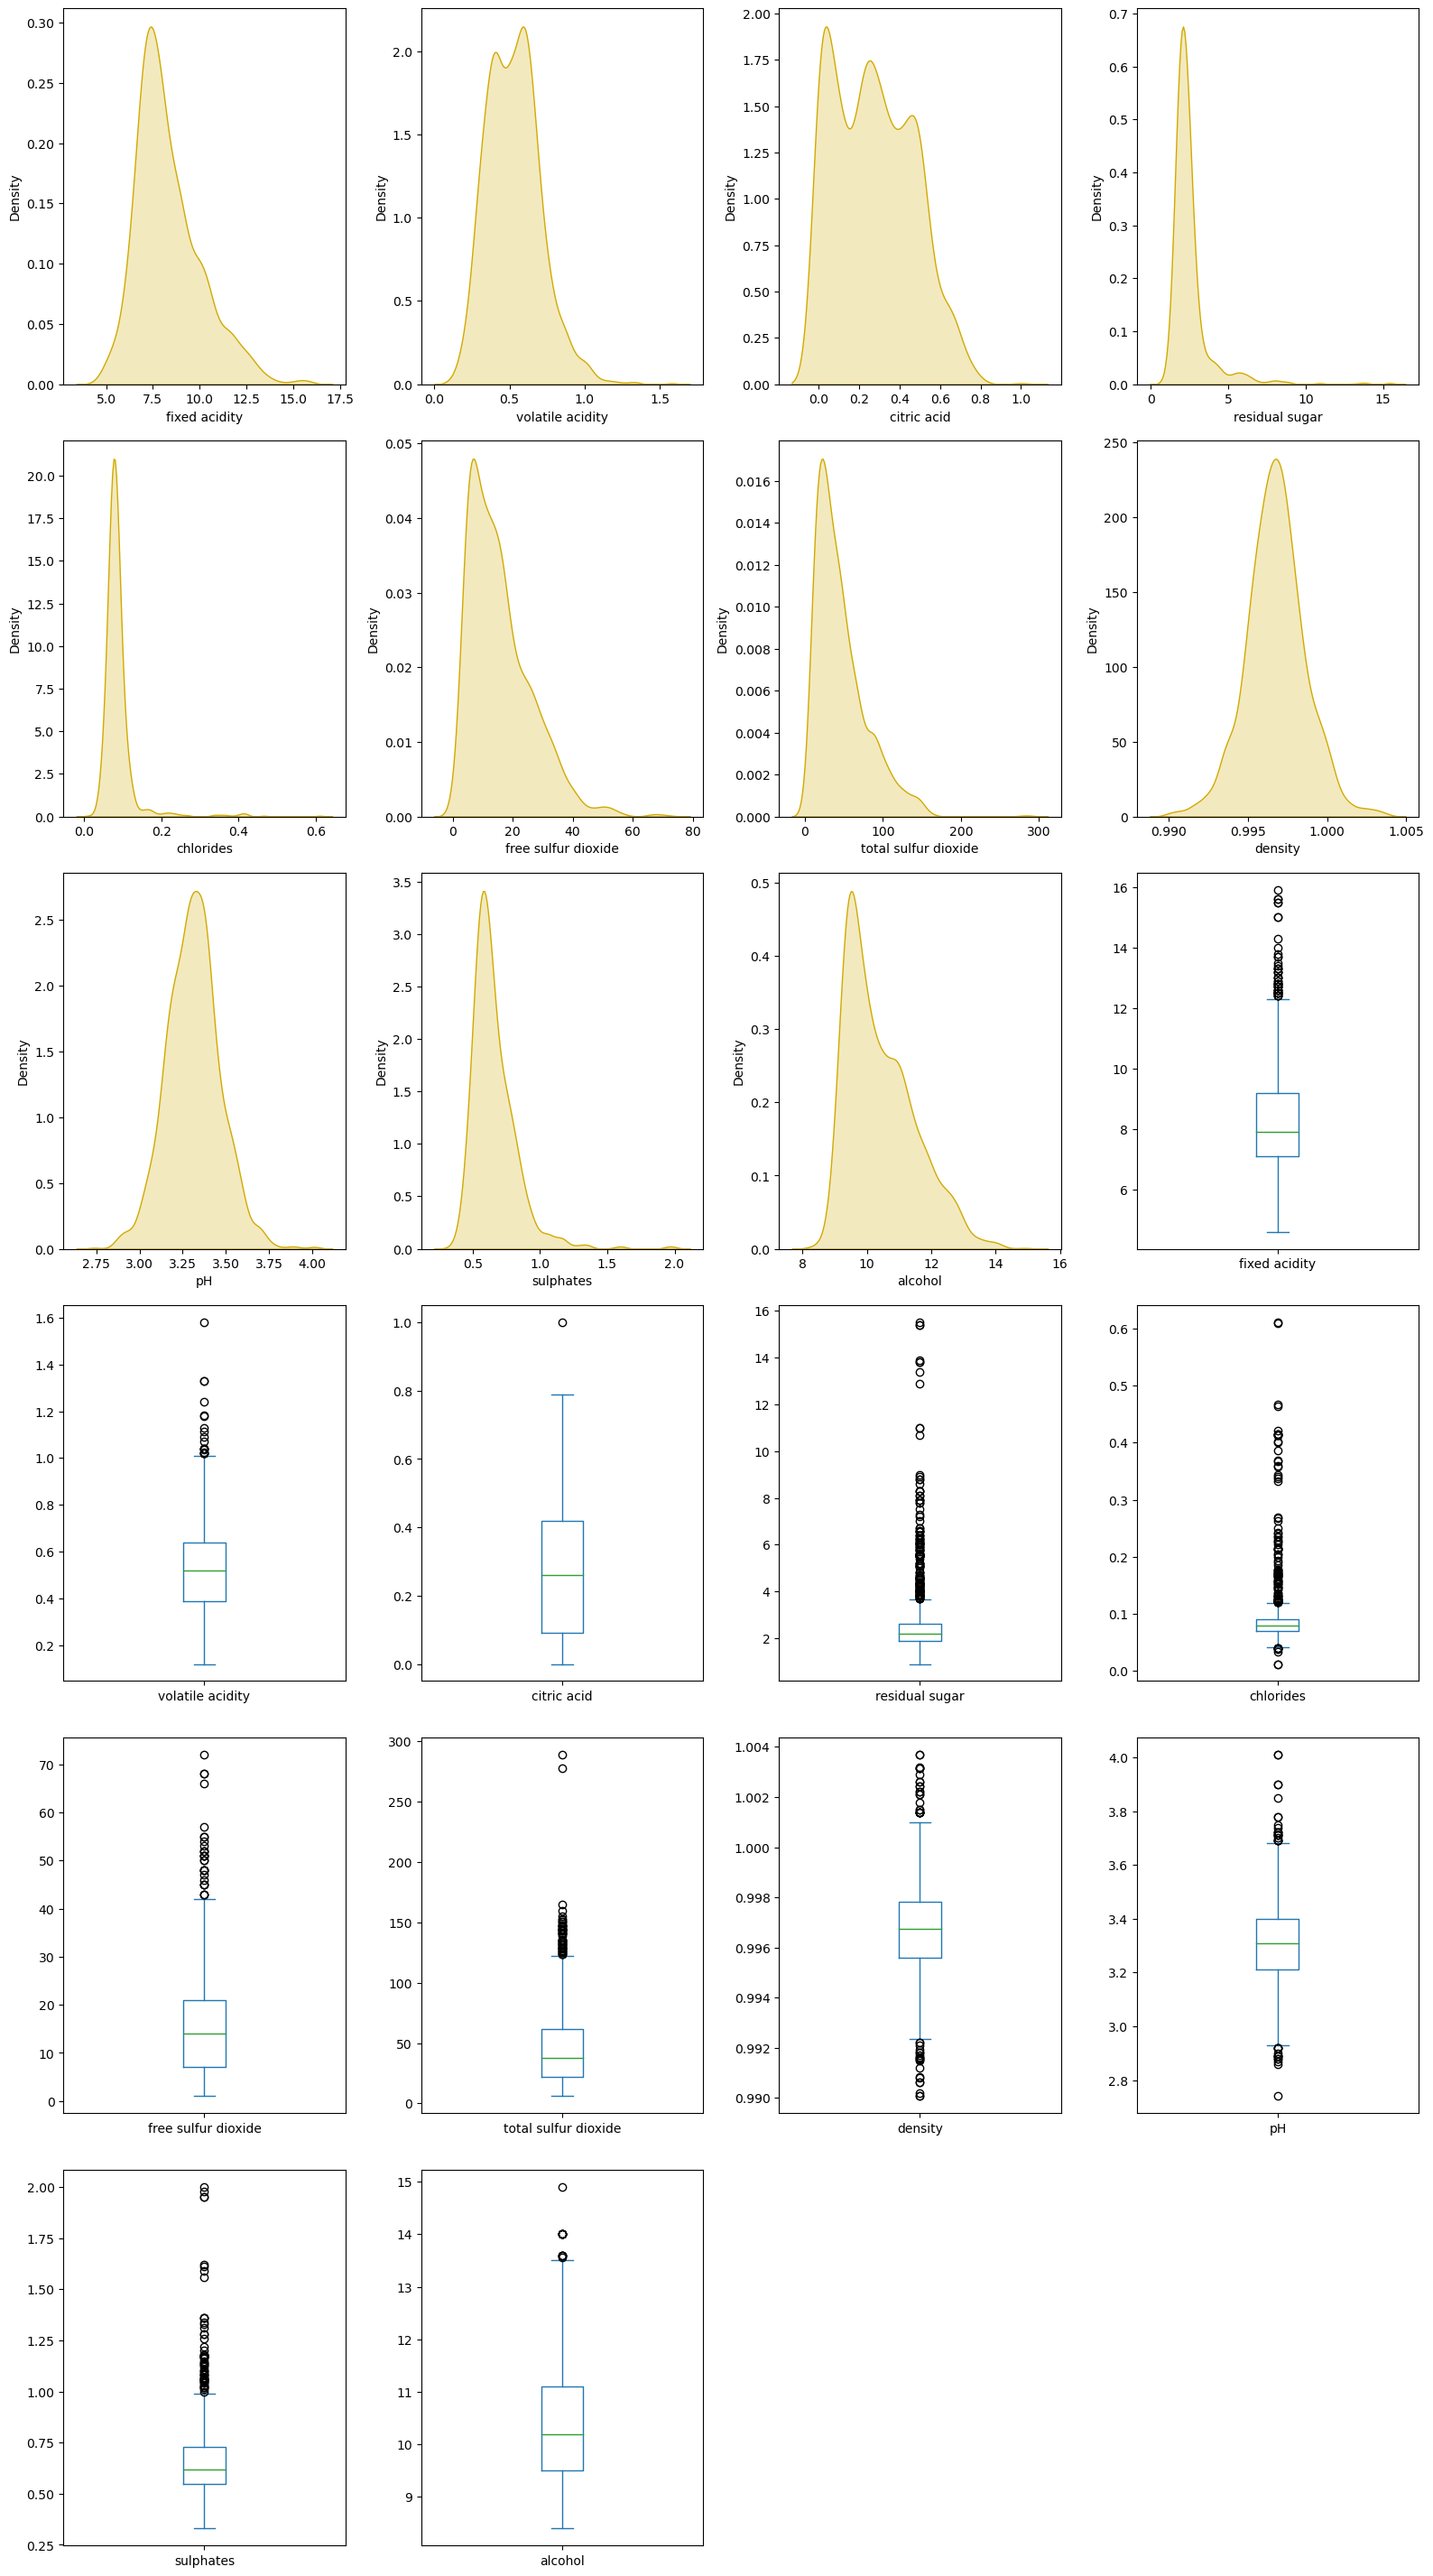

In [12]:
plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()


## 3. Traitement des Valeurs abbérrantes

Recherchons si les caratéristiques présentent de valeur nulle.

In [13]:
 df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

On constate qu'il y aucune valeur nulle

Vérifions s'il existe de valeurs manquantes

In [14]:
 df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

Il ya de valeurs en double. 

Examinons de plus près encore.

In [16]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Sans doute voyons-nous qu'il ya de doublons. 

Alors vérifions la somme de valeur double dans le DataFrame

In [17]:
# nombre des valeurs double dans le dataframe
df.duplicated().sum()

240

In [18]:
# Prenons une colonne et vérifions si elle contient de valeurs double  Ce sera le feature alcohol
df.alcohol.duplicated().sum()

1534

Ce feature  contient aussi de valeur double. 

In [19]:
# nombre de valeurs non dupliquées 
(~df.duplicated()).sum()

1359

In [20]:
# boucle pour les valeurs dupliquées
from scipy.stats import zscore


for i in columns:
    double = df[i].duplicated().sum()
    print('Le nombre de valeur dupliquée de [',i,'] est ',double)
   # y_outliers
    

Le nombre de valeur dupliquée de [ fixed acidity ] est  1503
Le nombre de valeur dupliquée de [ volatile acidity ] est  1456
Le nombre de valeur dupliquée de [ citric acid ] est  1519
Le nombre de valeur dupliquée de [ residual sugar ] est  1508
Le nombre de valeur dupliquée de [ chlorides ] est  1446
Le nombre de valeur dupliquée de [ free sulfur dioxide ] est  1539
Le nombre de valeur dupliquée de [ total sulfur dioxide ] est  1455
Le nombre de valeur dupliquée de [ density ] est  1163
Le nombre de valeur dupliquée de [ pH ] est  1510
Le nombre de valeur dupliquée de [ sulphates ] est  1503
Le nombre de valeur dupliquée de [ alcohol ] est  1534


In [21]:
# Extraction de ligne dupliquée
duplicateRows = df[df.duplicated()]
duplicateRows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [22]:
# on supprime les valeurs  doubles sur les ligne
df = df.drop_duplicates(keep=False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
# Assurons de notre nettoyage
df.duplicated().sum()

0

Maintenant essayons de voir s'il n'ya pas de colonnes en double.

In [24]:
duplicateColumns = df.T
duplicateColumns

,1,2,3,5,6,7,8,10,12,13,...,1587,1588,1589,1590,1591,1593,1594,1595,1597,1598
fixed acidity,7.8000,7.800,11.200,7.4000,7.9000,7.3000,7.8000,6.7000,5.6000,7.8000,...,5.80000,7.20000,6.6000,6.30000,5.40000,6.80000,6.2000,5.90000,5.90000,6.00000
volatile acidity,0.8800,0.760,0.280,0.6600,0.6000,0.6500,0.5800,0.5800,0.6150,0.6100,...,0.61000,0.66000,0.7250,0.55000,0.74000,0.62000,0.6000,0.55000,0.64500,0.31000
citric acid,0.0000,0.040,0.560,0.0000,0.0600,0.0000,0.0200,0.0800,0.0000,0.2900,...,0.11000,0.33000,0.2000,0.15000,0.09000,0.08000,0.0800,0.10000,0.12000,0.47000
residual sugar,2.6000,2.300,1.900,1.8000,1.6000,1.2000,2.0000,1.8000,1.6000,1.6000,...,1.80000,2.50000,7.8000,1.80000,1.70000,1.90000,2.0000,2.20000,2.00000,3.60000
chlorides,0.0980,0.092,0.075,0.0750,0.0690,0.0650,0.0730,0.0970,0.0890,0.1140,...,0.06600,0.06800,0.0730,0.07700,0.08900,0.06800,0.0900,0.06200,0.07500,0.06700
free sulfur dioxide,25.0000,15.000,17.000,13.0000,15.0000,15.0000,9.0000,15.0000,16.0000,9.0000,...,18.00000,34.00000,29.0000,26.00000,16.00000,28.00000,32.0000,39.00000,32.00000,18.00000
total sulfur dioxide,67.0000,54.000,60.000,40.0000,59.0000,21.0000,18.0000,65.0000,59.0000,29.0000,...,28.00000,102.00000,79.0000,35.00000,26.00000,38.00000,44.0000,51.00000,44.00000,42.00000
density,0.9968,0.997,0.998,0.9978,0.9964,0.9946,0.9968,0.9959,0.9943,0.9974,...,0.99483,0.99414,0.9977,0.99314,0.99402,0.99651,0.9949,0.99512,0.99547,0.99549
pH,3.2000,3.260,3.160,3.5100,3.3000,3.3900,3.3600,3.2800,3.5800,3.2600,...,3.55000,3.27000,3.2900,3.32000,3.67000,3.42000,3.4500,3.52000,3.57000,3.39000
sulphates,0.6800,0.650,0.580,0.5600,0.4600,0.4700,0.5700,0.5400,0.5200,1.5600,...,0.66000,0.78000,0.5400,0.82000,0.56000,0.82000,0.5800,0.76000,0.71000,0.66000


In [25]:
duplicateColumns.duplicated().sum()

0

Aucune colonne en double

Maintenant, il n'ya pas de lignes ni colonnes en double. Donc notre dataset est maintenant bon. 

 Nous allons utiliser les mesures __skweness et kurtosis__ pour faire l'évaluation de la 
 distributions de données. 
 
 __Skewness__ permet de voir la symétrie et __Kurtosis__ permet de voir la disparité. 
 
Prenons le feature __fixed acidity__ et affichons son __Skewness__ et __kurtosis__.

In [26]:
myskew = df['fixed acidity'].skew()
mykurtosis = df['fixed acidity'].kurtosis()
print(myskew)
print(mykurtosis)

0.889582473732798
0.9416591528597245


La variable __myskew__ est supérieure  à zero. Alors on peut confirmer notre __hypothèse (1)__ ( concentration de données du feature __fixed acidity__ à gauche).

On peut étendre ce principe à tous les autres features. 

In [27]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
skewness,0.889582,0.777681,0.304091,4.517631,5.310016,1.194147,1.58463,0.011417,0.273667,2.366662,0.859555
kurtosis,0.941659,1.240553,-0.793704,30.119815,35.434907,1.717221,4.35024,0.654488,0.996855,10.244253,0.119427


Maintenant , vérifions s'il n'existe pas des outliers dans nos features.
 
Nous allons utiliser le __z-score__. 

Si le z-score est inférieur à -3 ou supérieur à 3, il est considéré comme un outlier.

In [28]:

from scipy.stats import zscore


for i in columns:
    y_outliers = df[abs(zscore(df[i])) >= 3 ]
    print('Le nombre des outliers de ',i,'est ',len(y_outliers))
    y_outliers
    


Le nombre des outliers de  fixed acidity est  7
Le nombre des outliers de  volatile acidity est  8
Le nombre des outliers de  citric acid est  1
Le nombre des outliers de  residual sugar est  25
Le nombre des outliers de  chlorides est  24
Le nombre des outliers de  free sulfur dioxide est  14
Le nombre des outliers de  total sulfur dioxide est  9
Le nombre des outliers de  density est  8
Le nombre des outliers de  pH est  8
Le nombre des outliers de  sulphates est  20
Le nombre des outliers de  alcohol est  6


L'analyse univariée nous a permis de voir la distribution de nos caractérisques. Maintenant, essayons de trouver 
une corrélation entre nos features(caractéristiques) et notre target(cible). Nous allons procéder par __l'analyse bivariée__. 

L'analyse bivariée consiste à mettre les features en rélation avec le target.

Etant en face de données numériques, on peut les classer par catégories. 

Prenons par exemple le feature __'alcohol'__, examinons le de près. Donc nous allons voir ces valeurs afin de determiner le minimum et le maximum.


In [29]:
alcohol = df['alcohol'].unique()
print("=====================Les valeur du feature alcohol==============\n")
print(alcohol)
print("=======================================================================\n")
print('le minimum est',min(alcohol))
print('le maximum est', max(alcohol))


=====================Les valeur du feature alcohol==============

[ 9.8         9.4        10.          9.5         9.2         9.9
  9.1        10.5         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.7        12.9        10.4        10.9        11.5        13.
 11.4        12.4        11.         12.2        12.8        12.6
 11.7        12.5        11.3        12.3        12.         11.9
 11.8         8.7        13.3        11.2        11.6        11.1
 13.4        14.         12.1         8.4        12.7        14.9
 13.2        13.6        13.5         9.55        8.5        11.06666667
  9.56666667 10.55       13.56666667 11.95        9.95        9.23333333
  9.25        9.05       10.75      ]

le minimum est 8.4
le maximum est 14.9


Le taux d'alcool commence de 8.4 et finit à 14.9

Divisons cet intervale en quatre.

- Faible : quand le taux est inférieur  à 10
- Moyen :  quand le taux est entre 10 et 11,6
- Haut : quand le taux est entre 11,6 et 13.2
- Très Haut : quand le taux est supérieur à 13,2 

In [30]:
def alcool_join(alcohol):
    if alcohol <= 10:
        return "Faible"
    elif alcohol <= 11.6:
        return "Moyen"
    elif alcohol <= 13.2:
        return "Haut"
    else:
        return "Très Haut"

df['catégorie_alcool'] = df['alcohol'].apply(alcool_join)
df.sample(frac=1).head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,catégorie_alcool
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,Moyen
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,Faible
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,Faible
811,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,Moyen
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5,Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,9.4,0.430,0.24,2.8,0.092,14.0,45.0,0.99800,3.19,0.73,10.0,6,Faible
467,8.8,0.460,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6,Très Haut
470,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,5,Moyen
1568,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,9.2,5,Faible


Mettons la colonne que nous avons nommé __catégorie_alcool__ en relation avec la qualité du vin. 

<Figure size 1500x3000 with 0 Axes>

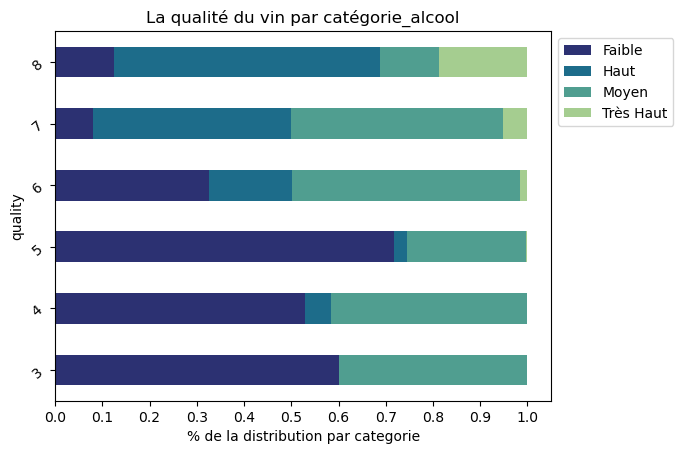

In [31]:
import numpy as np

plt.figure(figsize=(15,30))

cross = pd.crosstab(index=df['quality'],columns=df['catégorie_alcool'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% de la distribution par categorie')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("La qualité du vin par {}".format('catégorie_alcool'))
plt.show()

On constate que les vins de la catégorie 3  n'ont ni un très haut taux ni un haut taux d'alcool.

Par contre, les vins de la catégorie 8 ont les différents taux d'alocool

Si le but de l'analyse bivariée est de voir la corrélation entre les features (caractéristiques) et target (cible),
 faisons une corrélation de Pearson. 

<Axes: >

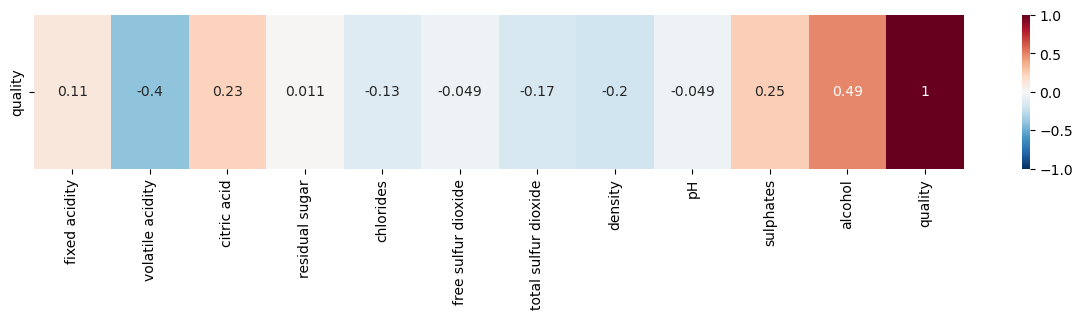

In [32]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr(numeric_only=True).iloc[[-1]],cmap='RdBu_r',annot=True,vmin=-1, vmax=1)

Le graphique ci-dessus est appélé  __HeatMap__.

Il nous révèle que les features __alcohol, sulphates, citric acid, et fixed acidity__ ont une forte corrélation avec la qualité du vin. 

En effet, d'après la formule de  Pearson, plus la valeur est proche de 0, moins il ya de corrélation. Plus on se rapproche de 1 , plus la corrélation est positive.  Plus on se rapproche de -1, plus la corrélation est négative.


Faisons la corrélation de tous les éléments pour voir leurs liaisons. Le resultat se traduit par ce graphique :



<Axes: >

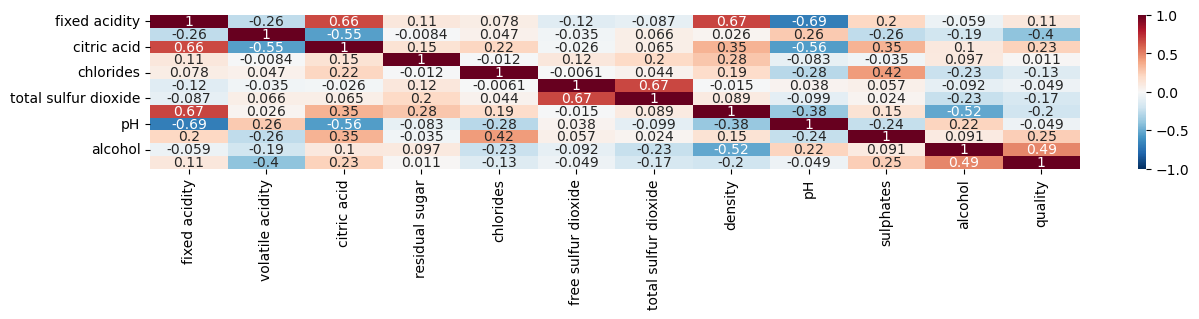

In [33]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr(numeric_only=True),cmap='RdBu_r',annot=True,vmin=-1, vmax=1)

On y voit les corrélations entre chaque caractéristiques.

 Commençons par créer une variable de type DataFrame à laquelle nous allons attribuer les données de notre cible

In [34]:
df_target = df['quality']
df_features = df.drop(columns = 'catégorie_alcool')

## 4. Entrainement du Modèle

Preparons les données en deux endroits :
    
- L'entrainement (train)
- Le test 

Soient __X__ reprensentant de features et __Y__ celui de target(cible).

On aura ainsi : 

- X_train
- X_test
- y_train
- y_test


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.20)

In [36]:
print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))

(911, 911)
(228, 228)


##  5. Validation et test du modèle

In [37]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
decisionTree.score(X_test, y_test)

1.0

In [39]:
y_test.iloc[:1]

376    6
Name: quality, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
randomForest.score(X_test, y_test)

0.9912280701754386

In [42]:
y_test.iloc[:1]

376    6
Name: quality, dtype: int64

## Conclusion 

D'après la lecture de données, leur visualisation, l'entrainement et le test de modèle , on conclue que le vin de la catégorie 6 est de bonne qualité. Ce resultat est confirmé par les Modèle Tree de Décision et Random Forest qui donne une précision de 0.99%